In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [3]:
cn=pd.read_csv(r"..\Data Sets\cleaned_novel_dataset.csv")
cn["Publish_Date"]=pd.to_datetime(cn["Publish_Date"])

In [4]:
without_duplicates=cn.drop_duplicates(subset=['Novel_Name', 'Series_Name', 'Author_Name'],keep="first")
without_duplicates

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
0,Clifford's War: The Bluegrass Battleground,-,J. Denison Reed,Action-Adventure,4.42,33,16,4,2021-05-27,2021
1,Jurassic Park,Jurassic Park,Michael Crichton,Action-Adventure,4.09,944442,19172,307,1990-07-11,1990
2,Sunburst,Sky King Ranch,Susan May Warren,Action-Adventure,4.43,1467,335,2,2022-01-06,2022
3,The Paris Apartment,-,Lucy Foley,Action-Adventure,3.67,473386,40240,3,2022-02-22,2022
4,Dempsey,Tier One,Brian Andrews,Action-Adventure,4.58,1708,86,13,2023-02-21,2023
...,...,...,...,...,...,...,...,...,...,...
6983,They Thirst,-,Robert McCammon,Horror/Paranormal,3.91,12688,564,46,1981-01-01,1981
6984,Snap,-,Steven Bredice,Horror/Paranormal,3.40,43,11,2,2012-01-01,2012
6985,The Traveling Vampire Show,-,Richard Laymon,Horror/Paranormal,3.83,8813,645,40,2000-01-04,2000
6986,WISHBONE...Be Careful What You Wish For,-,Brooklyn Hudson,Horror/Paranormal,3.73,764,94,2,2012-02-20,2012


### Multivariate Analysis

C:\Users\dawap\AppData\Local\Temp\ipykernel_8416\2770438996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(without_duplicates.corr(),annot=True)


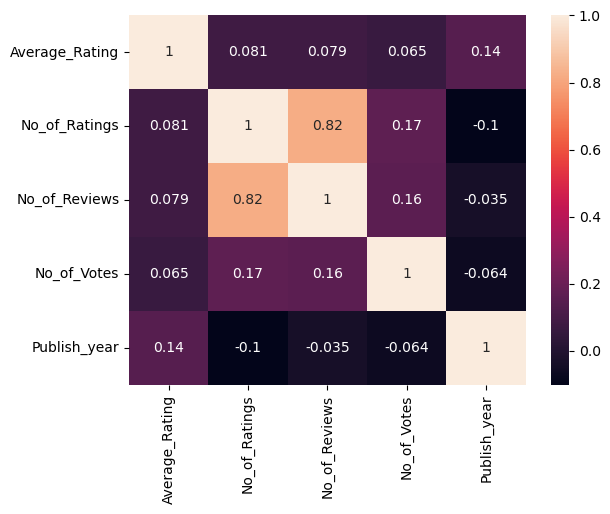

In [4]:
sns.heatmap(without_duplicates.corr(),annot=True)
plt.show()

From the above heatmap, we can understand that 
1. there is no corelation between average rating, number of ratings and number of reviews i.e. it doesn't hold that the books which has high average rating should have higher number of rating and higher number of reviews or vice versa. 
2. there is a good corelation between number of ratings and number of reviews i.e. the nuvels having higher number of ratings tend to have higher number of reviews and vice versa.
3. score is highly corelated to number of votes.
4. there is no correlation between the publish year and other variable.

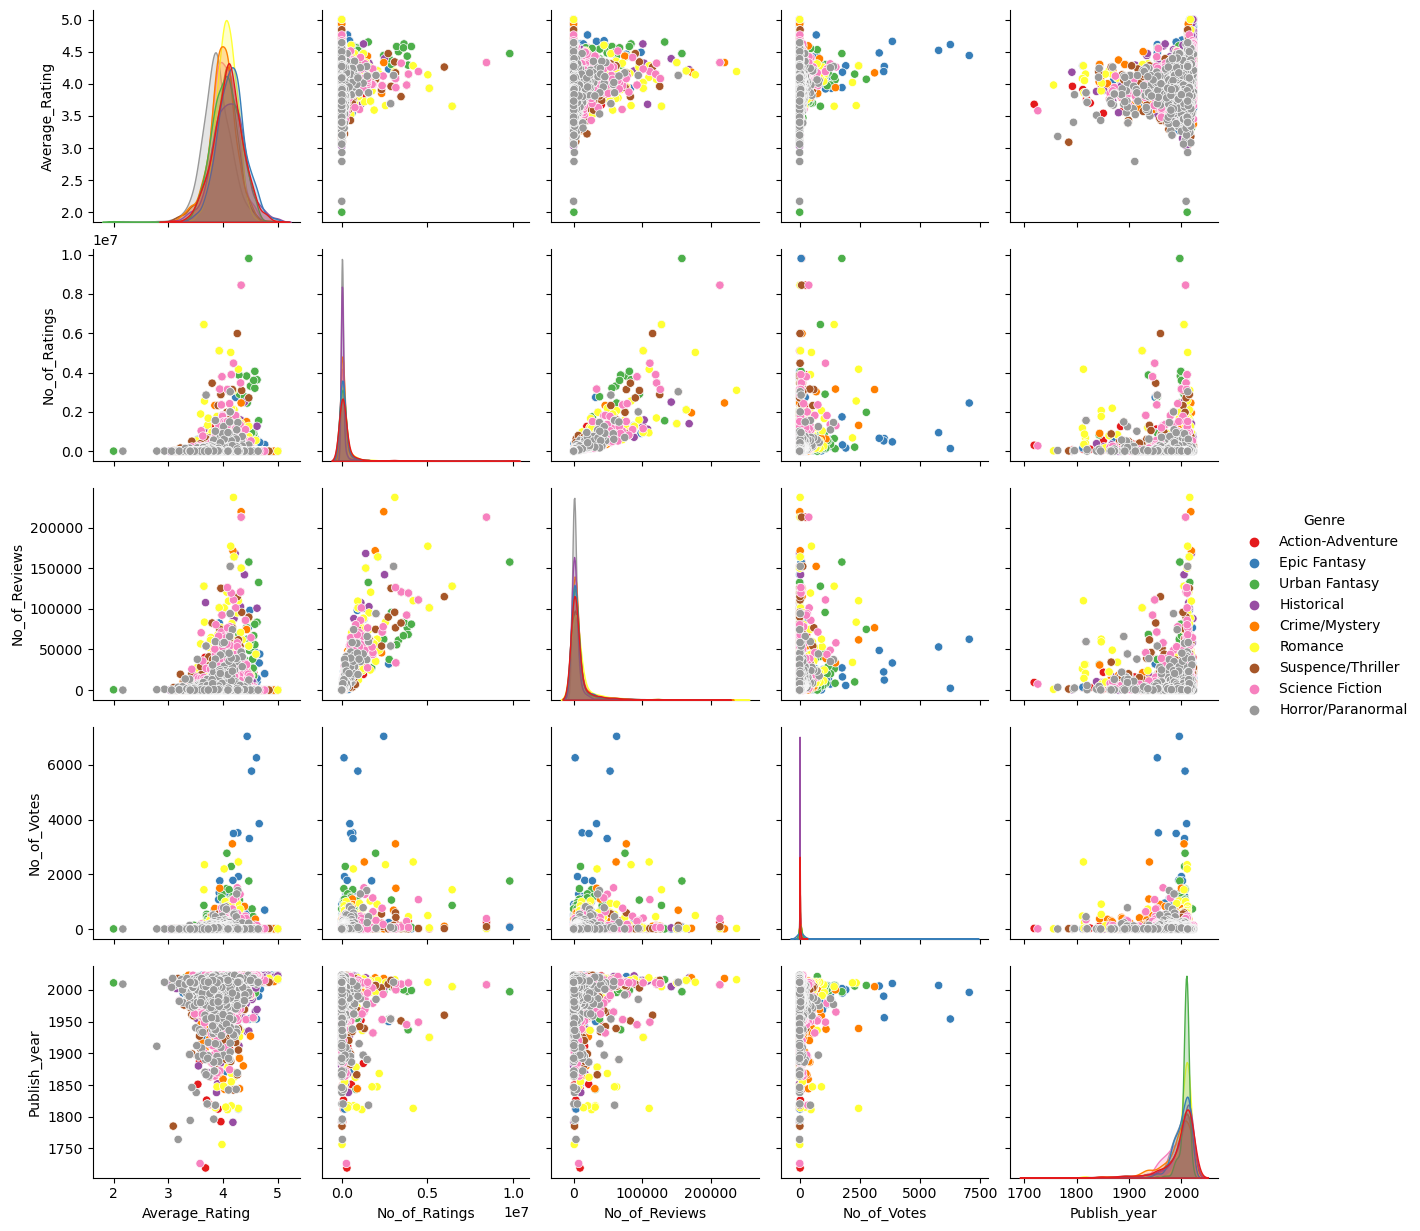

In [5]:
sns.pairplot(data=cn, hue='Genre', markers='o', palette='Set1')
plt.show()

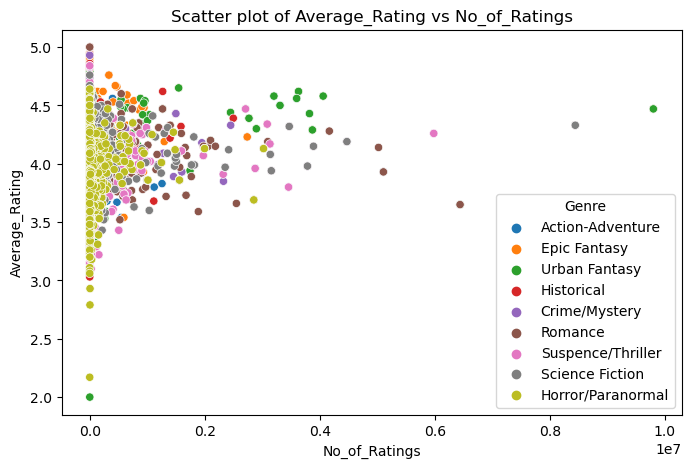

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cn,x="No_of_Ratings",y="Average_Rating",hue="Genre")
plt.title("Scatter plot of Average_Rating vs No_of_Ratings")
plt.show()

From the above scatter plot, we have observed that when the number of ratings is low, the average rating could range from low to high, but when the number of rating is more the average ratings are mostly high.

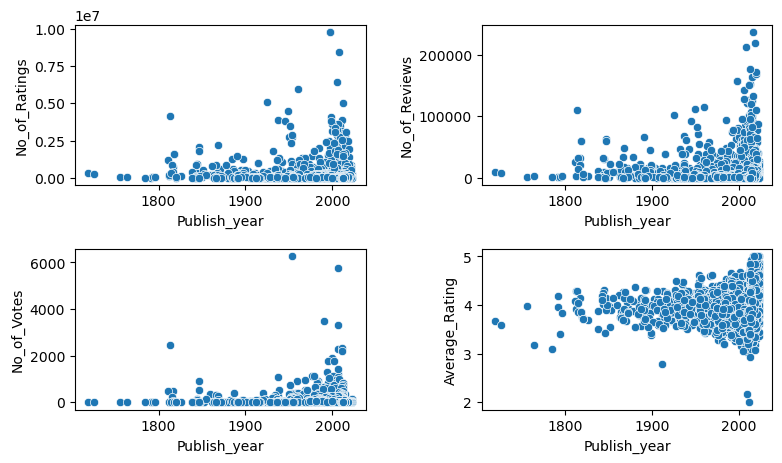

In [7]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(9,5))
fig.subplots_adjust(wspace=0.4,hspace=0.4)
sns.scatterplot(x='Publish_year',y='No_of_Ratings',data=without_duplicates,ax=axes[0,0])
sns.scatterplot(x='Publish_year',y='No_of_Reviews',data=without_duplicates,ax=axes[0,1])
sns.scatterplot(x='Publish_year',y='No_of_Votes',data=without_duplicates,ax=axes[1,0])
sns.scatterplot(x='Publish_year',y='Average_Rating',data=without_duplicates,ax=axes[1,1])
plt.show()

In [8]:
#The most popular novel in classics which stands out from all the data datapoints.
without_duplicates[(without_duplicates["Publish_year"].between(1800,1830))&(without_duplicates["No_of_Votes"]>2000)]

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
3920,Pride and Prejudice,-,Jane Austen,Romance,4.28,4167087,109904,2452,1813-01-28,1813


In [9]:
#The novels which has far more number of votes compared to all the others
without_duplicates[without_duplicates["No_of_Votes"]>5000]

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
802,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,-,J.R.R. Tolkien,Epic Fantasy,4.61,131800,2227,6259,1954-01-01,1954
809,The Name of the Wind,The Kingkiller Chronicle,Patrick Rothfuss,Epic Fantasy,4.52,939478,53030,5773,2007-03-27,2007


In [10]:
# The novels having very high number of ratings
without_duplicates[without_duplicates["No_of_Ratings"]>8000000]

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
16,The Hunger Games,The Hunger Games,Suzanne Collins,Action-Adventure,4.33,8444021,212733,252,2008-09-14,2008
159,Harry Potter and the Sorcerer's Stone,Harry Potter,J.K. Rowling,Action-Adventure,4.47,9802237,157515,83,1997-06-26,1997
1079,Harry Potter and the Philosopher’s Stone,Harry Potter,J.K. Rowling,Epic Fantasy,4.47,9802300,157519,65,1997-06-26,1997


In [11]:
#The novels having very high number of reviews
without_duplicates[without_duplicates["No_of_Reviews"]>200000]

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
16,The Hunger Games,The Hunger Games,Suzanne Collins,Action-Adventure,4.33,8444021,212733,252,2008-09-14,2008
3266,Verity,-,Colleen Hoover,Crime/Mystery,4.33,2451653,219429,8,2018-07-12,2018
4250,It Ends with Us,It Ends with Us,Colleen Hoover,Romance,4.19,3096375,237063,23,2016-02-08,2016


In [12]:
a=cn.groupby(by="Genre")["No_of_Votes"].idxmax()
a

Genre
Action-Adventure        1
Crime/Mystery        3116
Epic Fantasy          797
Historical           2381
Horror/Paranormal    6197
Romance              3920
Science Fiction      5405
Suspence/Thriller    4710
Urban Fantasy        1582
Name: No_of_Votes, dtype: int64

In [13]:
# novel details which were voted the most to be the best novel from each genre
result = cn.loc[a, ['Novel_Name','Series_Name','Author_Name','Genre','Average_Rating','No_of_Votes','Publish_Date']]
result

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Votes,Publish_Date
1,Jurassic Park,Jurassic Park,Michael Crichton,Action-Adventure,4.09,307,1990-07-11
3116,The Girl with the Dragon Tattoo,Millennium,Stieg Larsson,Crime/Mystery,4.17,3114,2005-01-08
797,A Game of Thrones,A Song of Ice and Fire,George R.R. Martin,Epic Fantasy,4.44,7044,1996-06-08
2381,Memoirs of a Geisha,-,Arthur Golden,Historical,4.15,78,1997-01-01
6197,The Shining,The Shining,Stephen King,Horror/Paranormal,4.27,1407,1977-01-28
3920,Pride and Prejudice,-,Jane Austen,Romance,4.28,2452,1813-01-28
5405,Dune,Dune,Frank Herbert,Science Fiction,4.26,1508,1965-01-06
4710,The Girl with the Dragon Tattoo,Millennium,Stieg Larsson,Suspence/Thriller,4.17,593,2005-01-08
1582,City of Bones,The Mortal Instruments,Cassandra Clare,Urban Fantasy,4.07,2771,2007-03-27


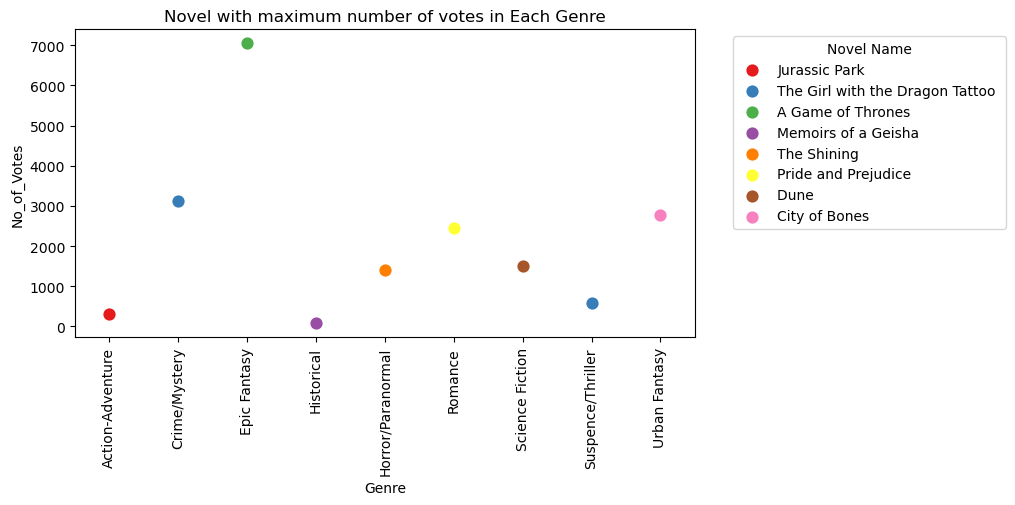

In [72]:
plt.figure(figsize=(8,4))
sns.pointplot(x='Genre', y='No_of_Votes', data=result, hue='Novel_Name', palette='Set1')
plt.title('Novel with maximum number of votes in Each Genre')
plt.xticks(rotation=90)
plt.legend(title='Novel Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above point plot shows the novels which were voted to be the best in a particular genre.

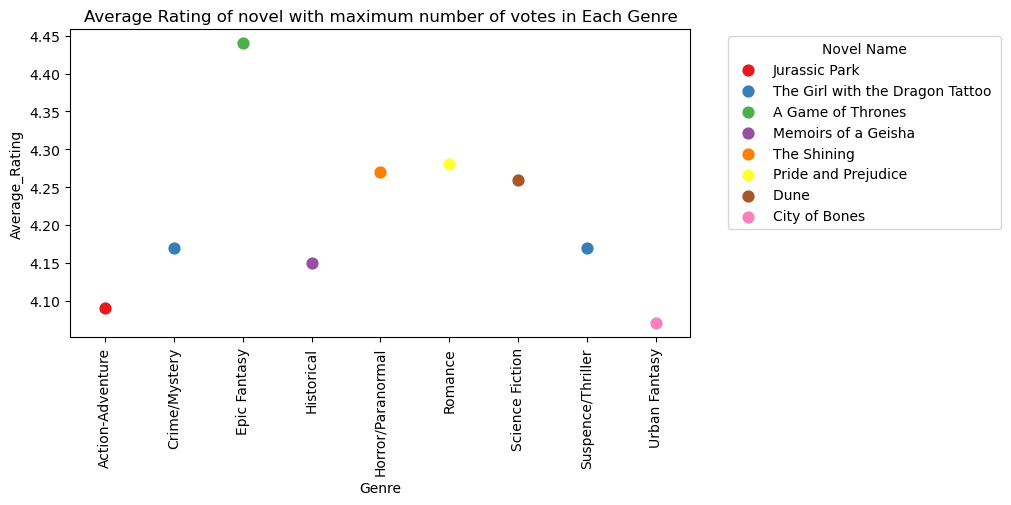

In [76]:
plt.figure(figsize=(8,4))
sns.pointplot(x='Genre', y='Average_Rating', data=result, hue='Novel_Name', palette='Set1')
plt.title('Average Rating of novel with maximum number of votes in Each Genre')
plt.xticks(rotation=90)
plt.legend(title='Novel Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above plot shows the average rating of the novels which are the most voted from each genre.

In [77]:
max_rating_indices = cn.groupby('Genre')['Average_Rating'].idxmax()
max_rating_novels = cn.loc[max_rating_indices,  ['Novel_Name','Series_Name','Author_Name','Genre','Average_Rating','No_of_Votes','Publish_Date']]

In [78]:
min_rating_indices = cn.groupby('Genre')['Average_Rating'].idxmin()
min_rating_novels = cn.loc[min_rating_indices,  ['Novel_Name','Series_Name','Author_Name','Genre','Average_Rating','No_of_Votes','Publish_Date']]

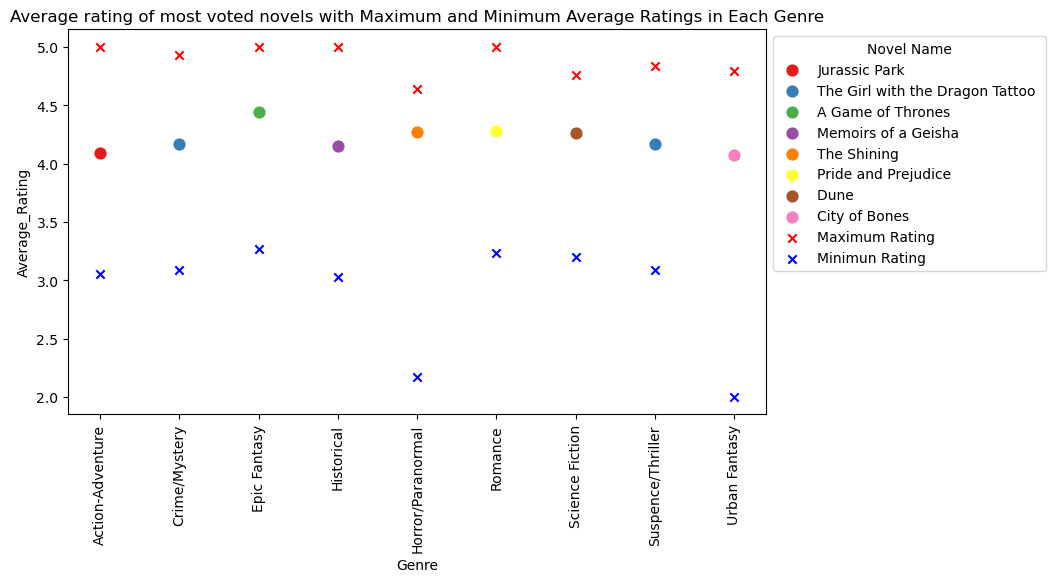

In [79]:
plt.figure(figsize=(9,5))
sns.pointplot(x='Genre', y='Average_Rating', data=result, hue='Novel_Name', palette='Set1')
plt.title('Average rating of most voted novels with Maximum and Minimum Average Ratings in Each Genre')
plt.xticks(rotation=90)
plt.scatter(x=max_rating_novels['Genre'], y=max_rating_novels['Average_Rating'], color='red', marker='x', label='Maximum Rating')
plt.scatter(x=min_rating_novels['Genre'], y=min_rating_novels['Average_Rating'], color='blue', marker='x', label='Minimun Rating')
plt.legend(title='Novel Name', bbox_to_anchor=(1,1))
plt.show()

The above plot shows how far the average rating of the best voted novel lie from the maximum and minimum average rating

In [80]:
without_duplicates["Publish_year"].min()

1719

In [81]:
without_duplicates["Publish_year"].max()

2023

In [82]:
_1700=without_duplicates[without_duplicates["Publish_year"].between(1700,1900)]
np.shape(_1700)[0]

102

In [83]:
_1700=_1700.sort_values("Average_Rating",ascending=False)
_1700

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
3537,The Brothers Karamazov,-,Fyodor Dostoevsky,Crime/Mystery,4.37,323773,18118,11,1880-01-01,1880
60,The Count of Monte Cristo,-,Alexandre Dumas,Action-Adventure,4.30,903121,30882,138,1844-08-28,1844
118,The Memoirs of Sherlock Holmes,Sherlock Holmes,Arthur Conan Doyle,Action-Adventure,4.30,96459,3034,5,1893-01-12,1893
459,The Adventures of Sherlock Holmes,Sherlock Holmes,Arthur Conan Doyle,Action-Adventure,4.30,296651,9179,21,1892-01-06,1892
3920,Pride and Prejudice,-,Jane Austen,Romance,4.28,4167087,109904,2452,1813-01-28,1813
...,...,...,...,...,...,...,...,...,...,...
6773,La mare au diable,-,George Sand,Horror/Paranormal,3.43,4261,252,3,1846-01-01,1846
6830,The Mysteries of Udolpho,-,Ann Radcliffe,Horror/Paranormal,3.40,15353,1395,3,1794-01-01,1794
2931,The Turn of the Screw,-,Henry James,Historical,3.39,152535,13364,1,1898-01-01,1898
6563,The Castle of Otranto,-,Horace Walpole,Horror/Paranormal,3.18,33801,3475,2,1764-01-01,1764


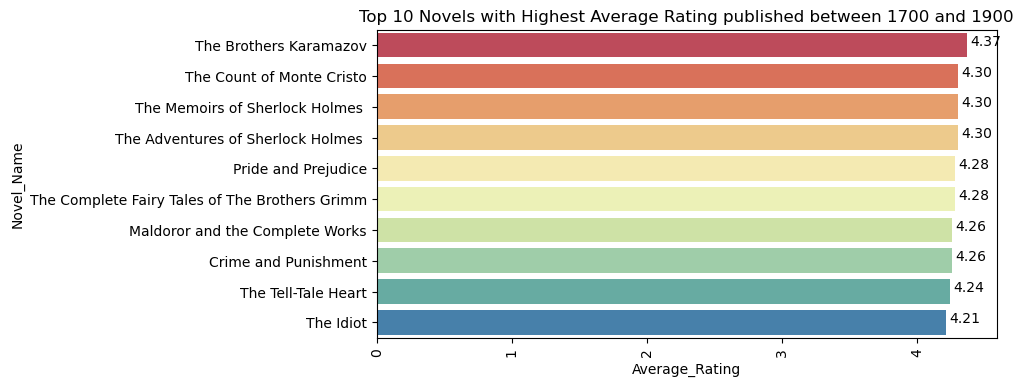

In [85]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=_1700.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 Novels with Highest Average Rating published between 1700 and 1900")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [86]:
_1900=without_duplicates[without_duplicates["Publish_year"].between(1900,2000)]
np.shape(_1900)[0]

1945

In [87]:
_1900=_1900.sort_values("Average_Rating",ascending=False)
_1900

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
1317,"The Absolute Sandman, Volume 1",-,Neil Gaiman,Epic Fantasy,4.65,21632,810,50,1990-01-10,1990
2554,Pawn in Frankincense,The Lymond Chronicles,Dorothy Dunnett,Historical,4.62,3881,257,2,1969-01-01,1969
802,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,-,J.R.R. Tolkien,Epic Fantasy,4.61,131800,2227,6259,1954-01-01,1954
1054,A Song of Ice and Fire,A Song of Ice and Fire,George R.R. Martin,Epic Fantasy,4.60,59782,1809,8,2000-01-01,2000
1042,The Song of the Lioness Quartet,Song of the Lioness,Tamora Pierce,Epic Fantasy,4.60,13868,307,7,1997-01-01,1997
...,...,...,...,...,...,...,...,...,...,...
6436,The Parasite,-,Ramsey Campbell,Horror/Paranormal,3.27,929,94,6,1980-01-08,1980
6712,Demons,-,John Shirley,Horror/Paranormal,3.26,512,40,2,2000-01-01,2000
6143,"Lies, Inc.",-,Philip K. Dick,Science Fiction,3.20,3256,312,22,1983-01-07,1983
6865,Psycho II,-,Robert Bloch,Horror/Paranormal,3.20,2432,324,3,1982-01-08,1982


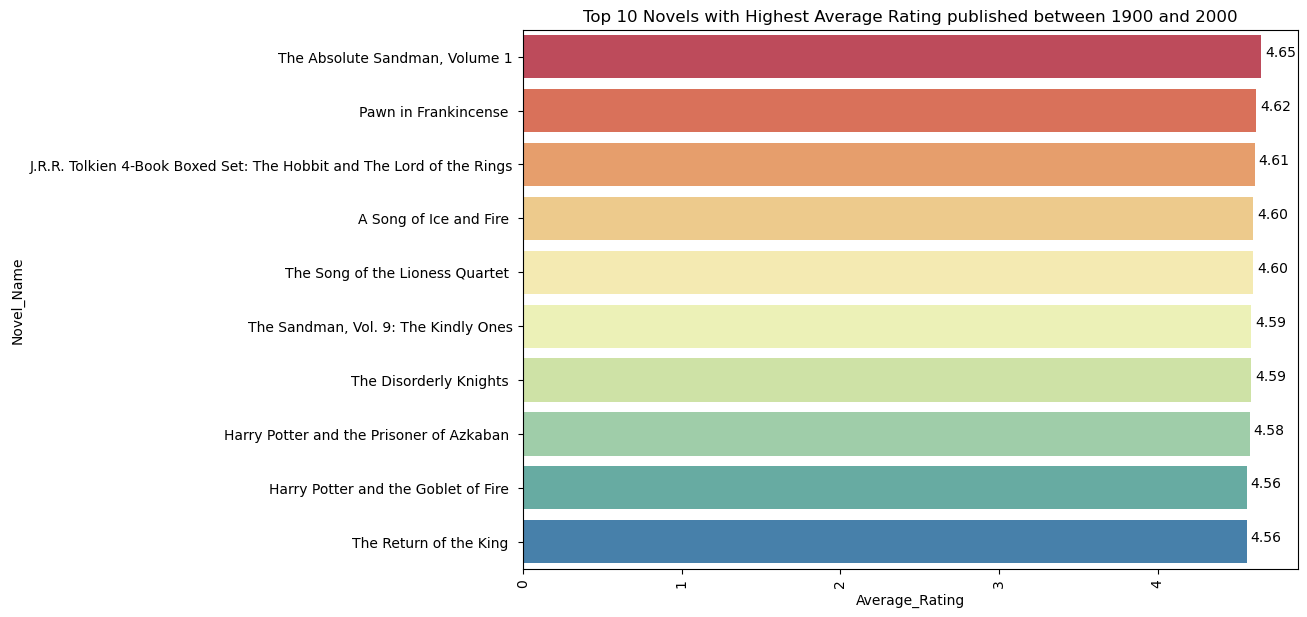

In [88]:
plt.figure(figsize=(10, 7))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=_1900.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 Novels with Highest Average Rating published between 1900 and 2000")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [89]:
_2000=without_duplicates[without_duplicates["Publish_year"]>=2000]
np.shape(_2000)[0]

3750

In [90]:
_2000=_2000.sort_values("Average_Rating",ascending=False)
_2000

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
4451,Adventures in Trichology,-,Nicholas A. Price,Romance,5.00,14,6,7,2017-06-05,2017
2938,Jeska,Stories from the Plantation Book WA,Lady Dre,Historical,5.00,3,1,1,2020-05-30,2020
1086,Masks of Moi'dan,-,James Dwyer,Epic Fantasy,5.00,14,2,5,2016-07-14,2016
2766,The Tears of the Desert: Love and Crime at the...,-,Conrad Fraider,Historical,5.00,2,0,1,2018-05-03,2018
2392,Born a Viking: Blót,-,Riccardo Polacci,Historical,5.00,4,1,1,2023-09-22,2023
...,...,...,...,...,...,...,...,...,...,...
205,Greegs & Ladders,-,Zack Mitchell,Action-Adventure,3.05,272,13,2,2013-06-22,2013
2424,Children of Witches,-,Sherri Smith,Historical,3.03,106,24,1,2009-01-01,2009
6512,Red Rain,-,R.L. Stine,Horror/Paranormal,2.93,5174,1042,2,2012-09-10,2012
6223,Imaginary Friends,-,Yolanda Jackson,Horror/Paranormal,2.17,6,1,2,2009-06-03,2009


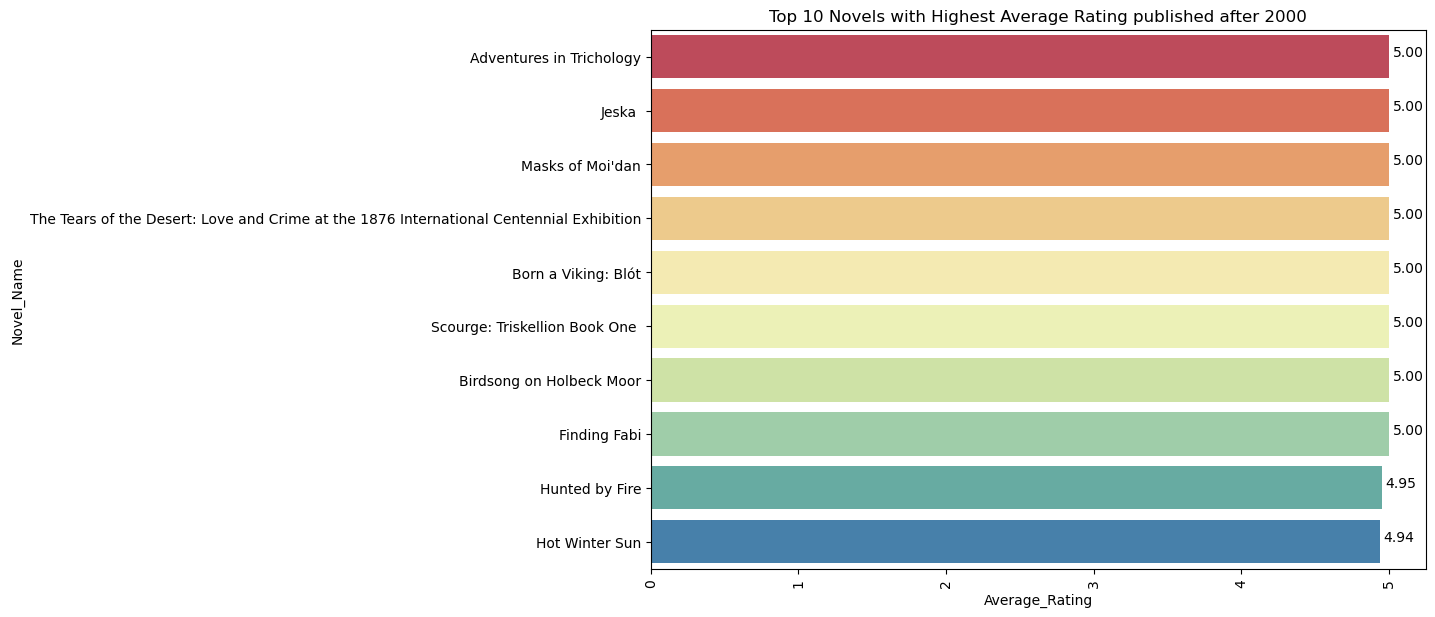

In [91]:
plt.figure(figsize=(10, 7))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=_2000.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 Novels with Highest Average Rating published after 2000")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [92]:
rev=without_duplicates.sort_values("No_of_Reviews",ascending=False)

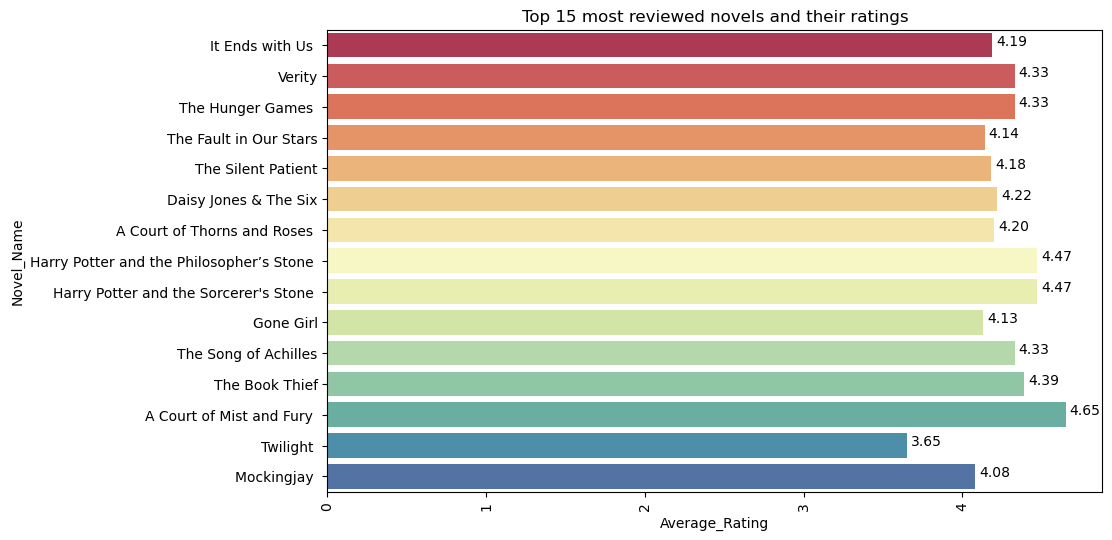

In [93]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=rev.head(15),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 15 most reviewed novels and their ratings")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [94]:
rev_1700=_1700.sort_values("No_of_Reviews",ascending=False)
rev_1700

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
3920,Pride and Prejudice,-,Jane Austen,Romance,4.28,4167087,109904,2452,1813-01-28,1813
3814,The Picture of Dorian Gray,-,Oscar Wilde,Crime/Mystery,4.12,1484785,65954,20,1890-01-06,1890
3980,Jane Eyre,-,Charlotte Brontë,Romance,4.15,2061391,62672,909,1847-10-16,1847
4729,Frankenstein: The 1818 Text,-,Mary Wollstonecraft Shelley,Suspence/Thriller,3.86,1560822,59608,7,1818-01-01,1818
2363,Frankenstein,-,Mary Wollstonecraft Shelley,Urban Fantasy,3.86,1560808,59608,12,1818-01-01,1818
...,...,...,...,...,...,...,...,...,...,...
2551,Ogniem i mieczem,Trylogia,Henryk Sienkiewicz,Historical,4.04,5788,249,3,1884-01-01,1884
644,The Vicomte de Bragelonne,The D'Artagnan Romances,Alexandre Dumas,Action-Adventure,3.98,8068,249,4,1847-01-01,1847
6609,Maldoror and the Complete Works,-,Comte de Lautréamont,Horror/Paranormal,4.26,3792,181,2,1869-01-01,1869
6882,The Monk and the Hangman's Daughter,-,Ambrose Bierce,Horror/Paranormal,3.72,962,128,2,1892-01-01,1892


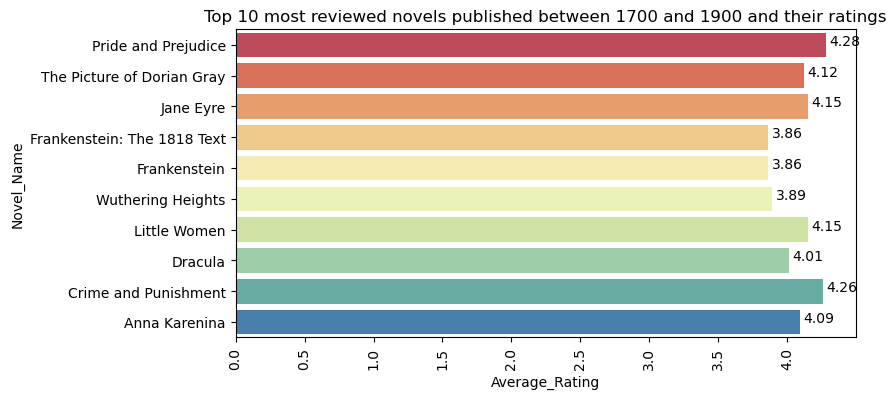

In [95]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=rev_1700.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 most reviewed novels published between 1700 and 1900 and their ratings")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [96]:
rev_1900=_1900.sort_values("No_of_Reviews",ascending=False)
rev_1900

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
1079,Harry Potter and the Philosopher’s Stone,Harry Potter,J.K. Rowling,Epic Fantasy,4.47,9802300,157519,65,1997-06-26,1997
159,Harry Potter and the Sorcerer's Stone,Harry Potter,J.K. Rowling,Action-Adventure,4.47,9802237,157515,83,1997-06-26,1997
3148,To Kill a Mockingbird,-,Harper Lee,Crime/Mystery,4.26,5983205,114903,102,1960-11-07,1960
614,1984,-,George Orwell,Action-Adventure,4.19,4472730,110918,20,1949-08-06,1949
545,The Great Gatsby,-,F. Scott Fitzgerald,Action-Adventure,3.93,5107550,101192,12,1925-10-04,1925
...,...,...,...,...,...,...,...,...,...,...
6412,Abducted! The Story of the Intruders Continues...,-,Debbie Jordan,Horror/Paranormal,3.52,23,5,2,1995-01-01,1995
2769,Rest without peace,-,Elizabeth Byrd,Historical,4.17,12,3,1,1974-01-01,1974
2536,No Turning Back,-,Lidia Falcón,Historical,4.50,6,3,1,1992-01-06,1992
2461,The Dragon Riders,-,Christie Dickason,Historical,3.92,38,3,1,1986-01-09,1986


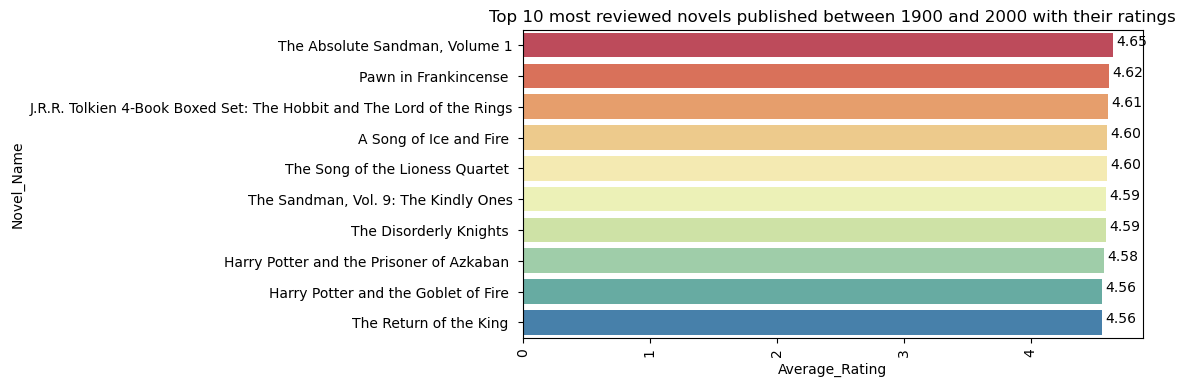

In [97]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=_1900.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 most reviewed novels published between 1900 and 2000 with their ratings")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

In [98]:
rev_2000=_2000.sort_values("No_of_Reviews",ascending=False)
rev_2000

,Novel_Name,Series_Name,Author_Name,Genre,Average_Rating,No_of_Ratings,No_of_Reviews,No_of_Votes,Publish_Date,Publish_year
4250,It Ends with Us,It Ends with Us,Colleen Hoover,Romance,4.19,3096375,237063,23,2016-02-08,2016
3266,Verity,-,Colleen Hoover,Crime/Mystery,4.33,2451653,219429,8,2018-07-12,2018
16,The Hunger Games,The Hunger Games,Suzanne Collins,Action-Adventure,4.33,8444021,212733,252,2008-09-14,2008
4093,The Fault in Our Stars,-,John Green,Romance,4.14,5022888,177022,493,2012-10-01,2012
3905,The Silent Patient,-,Alex Michaelides,Crime/Mystery,4.18,1950132,171418,26,2019-05-02,2019
...,...,...,...,...,...,...,...,...,...,...
5429,The Gateway,Colonization,Scott McElhaney,Science Fiction,4.19,31,0,10,2015-09-16,2015
311,Indigo Lost,-,Aleksandar Gutovic,Action-Adventure,4.14,7,0,2,2020-11-23,2020
465,The Final Oracle,-,Daniel Molitor,Action-Adventure,3.50,4,0,2,2008-12-29,2008
6723,J. Sheridan LeFanu's Greatest Ghastly Tales,-,J. Sheridan Le Fanu,Horror/Paranormal,3.50,12,0,2,2004-01-01,2004


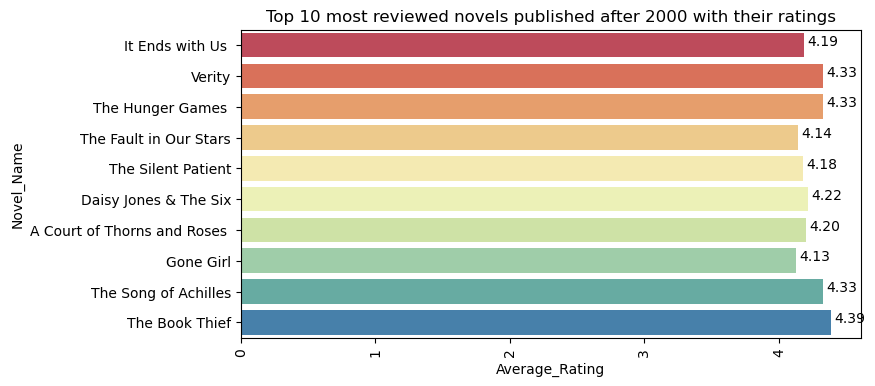

In [99]:
plt.figure(figsize=(8, 4))
ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=rev_2000.head(10),palette="Spectral")
plt.xticks(rotation=90)
plt.title("Top 10 most reviewed novels published after 2000 with their ratings")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
plt.show()

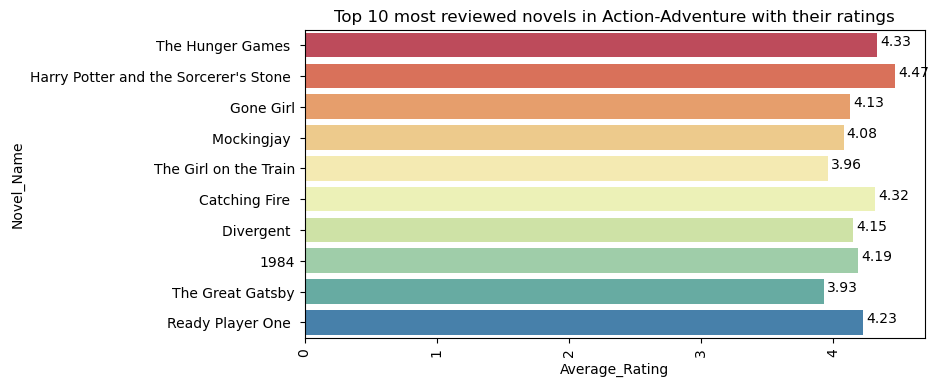

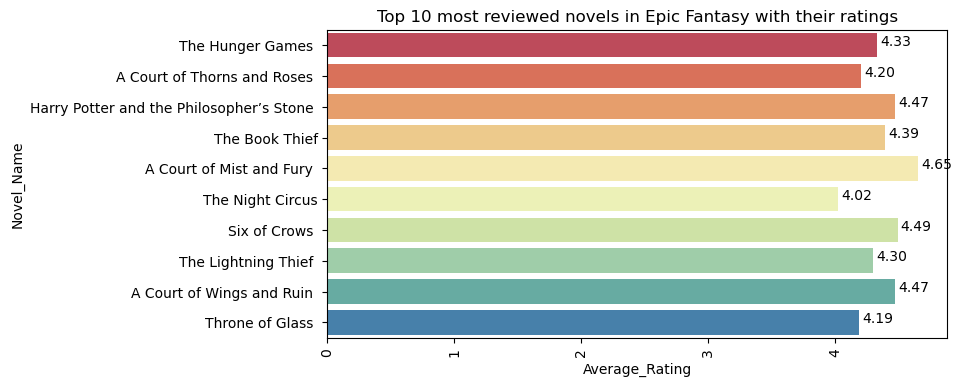

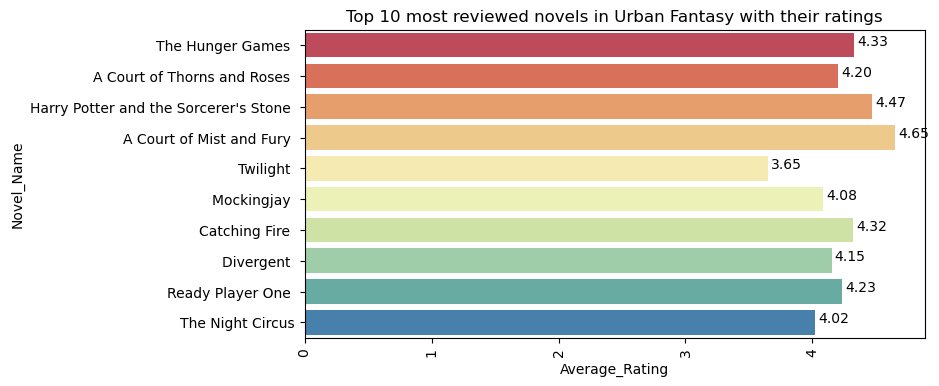

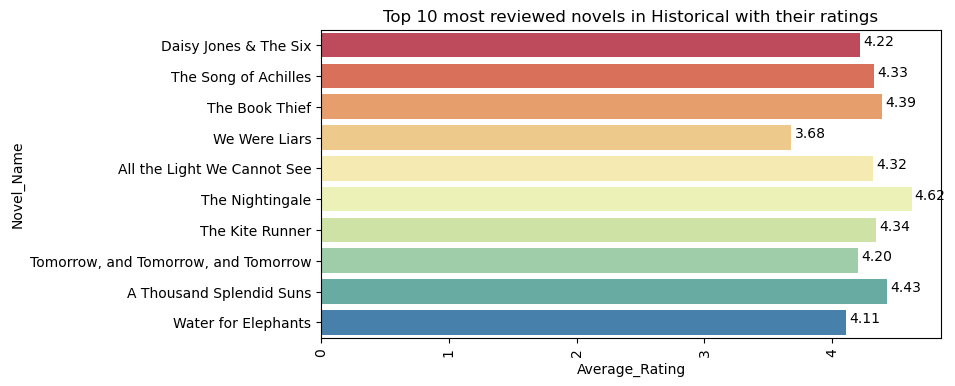

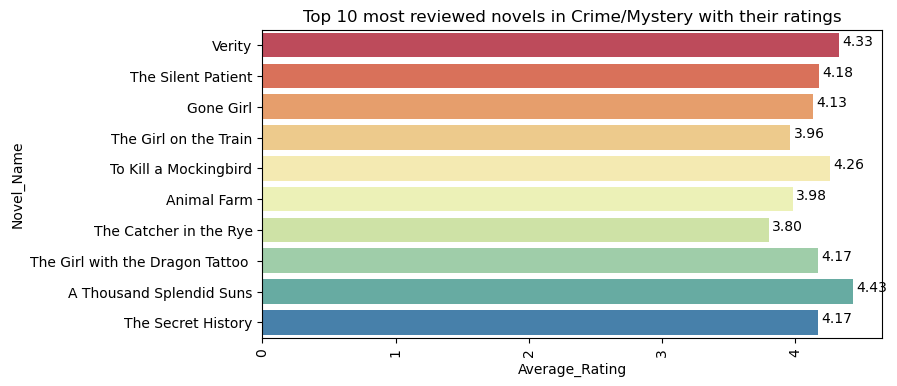

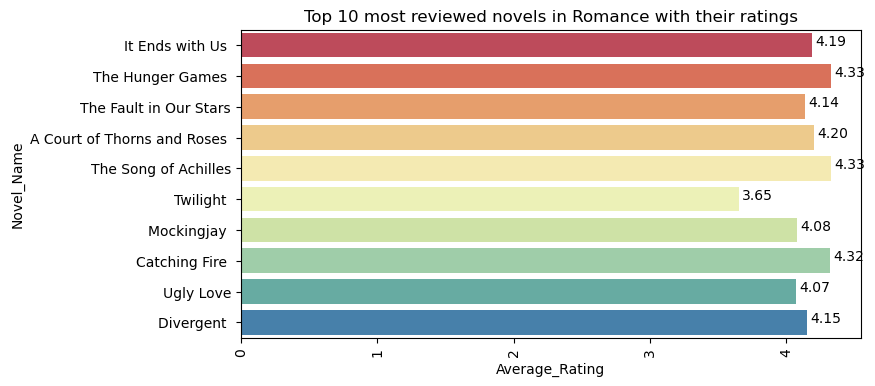

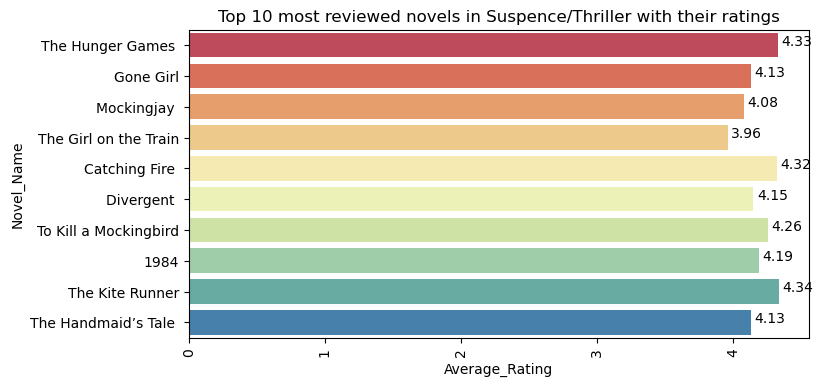

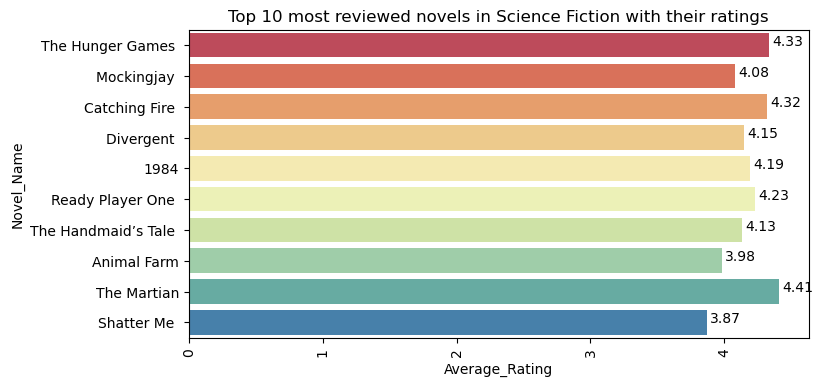

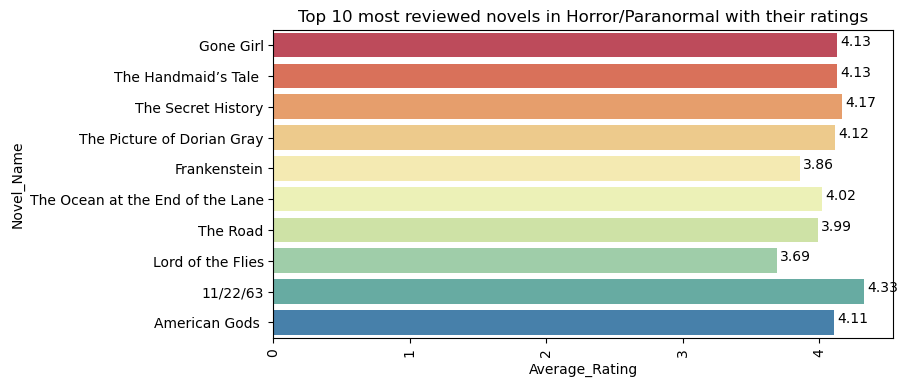

In [100]:
for i in cn["Genre"].unique():
    rev_romance=cn[cn['Genre']==i].sort_values("No_of_Reviews",ascending=False)
    plt.figure(figsize=(8, 4))
    ax=sns.barplot(x='Average_Rating',y='Novel_Name',data=rev_romance.head(10),palette="Spectral")
    plt.xticks(rotation=90)
    plt.title(f"Top 10 most reviewed novels in {i} with their ratings")
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.2f}',(p.get_width()+0.025,p.get_y()+p.get_height()/2))
    plt.show()